The movies dataset -> https://www.kaggle.com/rounakbanik/the-movies-dataset

In [22]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
DATA_DIR = Path('../data')
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'

In [12]:
raw_ratings_df = pd.read_csv(DATA_DIR / 'ratings_small.csv')
raw_movies_df = pd.read_csv(DATA_DIR / 'movies_metadata.csv')
display(raw_ratings_df.sample(5))
raw_movies_df.sample(5)

/Users/alaa.bakhti/miniconda3/envs/recsys_students/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,userId,movieId,rating,timestamp
4648,23,7759,1.0,1166035969
70219,486,58156,3.0,1464121445
74028,517,266,5.0,846450043
25075,182,765,5.0,845745957
66370,468,4025,2.0,1296196927


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
359,False,"{'id': 94032, 'name': 'The Lion King Collectio...",45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,8587,tt0110357,en,The Lion King,A young lion cub named Simba can't wait to be ...,...,1994-06-23,788241776.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,False,8.0,5520.0
35345,False,NaN,0,"[{'id': 10402, 'name': 'Music'}]",NaN,273085,tt0349136,en,David Bowie: Best Of Bowie,"Disc 1: Oh. You Pretty Things, Queen Bitch), F...",...,2002-06-30,0.0,204.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,David Bowie: Best Of Bowie,True,8.3,3.0
29351,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.hbo.com/documentaries/its-me-hilary...,328799,tt4322280,en,"It's Me, Hilary: The Man Who Drew Eloise","This portrait of Hilary Knight, the artist beh...",...,2015-01-24,0.0,36.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His illustrations inspired her imagination.,"It's Me, Hilary: The Man Who Drew Eloise",False,6.0,2.0
25469,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,68750,tt0426138,en,Rapid Fire,A desperate band of Militia men attempts a day...,...,2006-01-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The explosive true story!,Rapid Fire,False,5.5,4.0
627,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,40926,tt0113122,en,Frisk,A first person narrative of a gay serial kille...,...,1996-03-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Frisk,False,3.0,3.0


## Column types

In [16]:
raw_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
raw_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- Timestamp is the time when the ... so we need to convert it to datetime

## Missing Values

In [14]:
raw_ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Distribution

### Ratings

In [17]:
raw_ratings_df.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

/Users/alaa.bakhti/miniconda3/envs/recsys_students/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

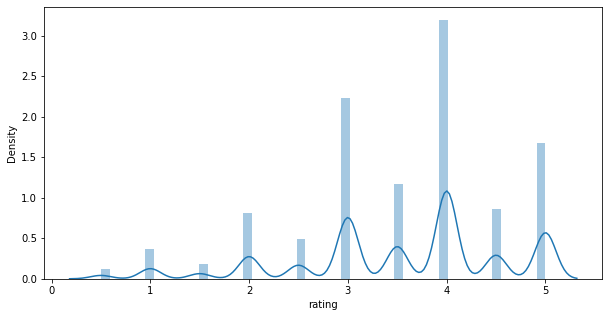

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(raw_ratings_df.rating)